In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
def read_arable_land(filename):
    # Read the Worldbank format file using pandas
    df = pd.read_csv(filename, skiprows=4)

    df = df.fillna(0)
    df=df.drop([ 'Country Code', 'Indicator Code'], axis=1)

    # df_countries = df_years.transpose()
    return df

In [63]:

df_arabale = read_arable_land('/content/drive/MyDrive/Colab Notebooks/projects/data visulization/arable/API_AG.LND.ARBL.ZS_DS2_en_csv_v2_5362201.csv')

In [64]:
df_arabale_temp=df_arabale

In [21]:
df_arabale_countries=df_arabale.transpose()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# Get the last 10 years of data
data_1 = df_arabale.loc[:, "2010":"2020"]
data_2 = df_arabale.loc[:, "2000":"2010"]
data_3 = df_arabale.loc[:, "1990":"2000"]
data_4 = df_arabale.loc[:, "1980":"1990"]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

transformed_data_1 = scaler.fit_transform(data_1)
transformed_data_2 = scaler.fit_transform(data_2)
transformed_data_3 = scaler.fit_transform(data_3)
transformed_data_4 = scaler.fit_transform(data_3)

# Define the number of clusters
n_clusters = 3

# Apply KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_1 = kmeans.fit_predict(transformed_data_1)
labels_2 = kmeans.fit_predict(transformed_data_2)
labels_3 = kmeans.fit_predict(transformed_data_3)
labels_4 = kmeans.fit_predict(transformed_data_4)


In [23]:
# Add the cluster labels to the original dataframe
df_arabale["2010-2020"] = labels_1
df_arabale["2000-2010"] = labels_2
df_arabale["1990-2000"] = labels_3
df_arabale["1980-1990"] = labels_4
# Print the cluster assignments
print(df_arabale[["Country Name", "2010-2020","2000-2010","1990-2000", "1980-1990"]])

                    Country Name  2010-2020  2000-2010  1990-2000  1980-1990
0                          Aruba          0          0          0          0
1    Africa Eastern and Southern          0          1          0          0
2                    Afghanistan          0          0          0          0
3     Africa Western and Central          0          0          0          0
4                         Angola          0          1          0          0
..                           ...        ...        ...        ...        ...
261                       Kosovo          0          1          0          0
262                  Yemen, Rep.          0          1          0          0
263                 South Africa          0          0          0          0
264                       Zambia          0          1          0          0
265                     Zimbabwe          0          0          0          0

[266 rows x 5 columns]


In [92]:
# Get the indices of each cluster
C1 = df_arabale[df_arabale["2010-2020"] == 0].index
C2 = df_arabale[df_arabale["2010-2020"] == 1].index
C3 = df_arabale[df_arabale["2010-2020"] == 2].index

# Print the names of countries in each cluster
print("Cluster 1 countries:")
print(df_arabale.loc[C1, "Country Name"].to_string(index=False))
print()
print("Cluster 2 countries:")
print(df_arabale.loc[C2, "Country Name"].to_string(index=False))
print()
print("Cluster 3 countries:")
print(df_arabale.loc[C3, "Country Name"].to_string(index=False))
print()


KeyError: ignored

In [35]:
# Count the number of countries in each cluster for 2010 to 2020
cluster_1=[]
cluster_2=[]
cluster_3=[]
list_cls=['2010-2020','2000-2010','1990-2000','1980-1990']
for cls in list_cls:
  print("clusters in "+str(cls))
  count = df_arabale[cls].value_counts()
  print("Cluster 1 has {} countries".format(count[0]))
  cluster_1.append(count[0])
  print("Cluster 2 has {} countries".format(count[1]))
  cluster_2.append(count[1])
  print("Cluster 3 has {} countries".format(count[2]))
  cluster_3.append(count[2])


clusters in 2010-2020
Cluster 1 has 185 countries
Cluster 2 has 51 countries
Cluster 3 has 30 countries
clusters in 2000-2010
Cluster 1 has 92 countries
Cluster 2 has 137 countries
Cluster 3 has 37 countries
clusters in 1990-2000
Cluster 1 has 178 countries
Cluster 2 has 30 countries
Cluster 3 has 58 countries
clusters in 1980-1990
Cluster 1 has 178 countries
Cluster 2 has 30 countries
Cluster 3 has 58 countries


In [41]:
def print_yearwise_change(years,cluster_1,cluster_2,cluster_3):
    """
    This function creates a bar plot that shows the distribution of countries across the three clusters
    for different year ranges.

    Parameters:
    years (list of str): A list of strings representing the year ranges for which the distribution is to be plotted.
    cluster_1 (list of int): A list of integers representing the number of countries in cluster 1 for each year range.
    cluster_2 (list of int): A list of integers representing the number of countries in cluster 2 for each year range.
    cluster_3 (list of int): A list of integers representing the number of countries in cluster 3 for each year range.

    Returns:
    None
    """
    # Define the x-axis positions
    x_pos = [i for i, _ in enumerate(years)]

    # Create the bar plot for each cluster
    plt.bar(x_pos, cluster_1, color='blue', edgecolor='black', width=0.3)
    plt.bar([i + 0.3 for i in x_pos], cluster_2, color='orange', edgecolor='black', width=0.3)
    plt.bar([i + 0.6 for i in x_pos], cluster_3, color='green', edgecolor='black', width=0.3)

    # Add axis labels and title
    plt.xlabel("Year Range")
    plt.ylabel("Number of Countries")
    plt.title("Cluster Distribution")

    # Add tick labels
    plt.xticks([i + 0.3 for i in x_pos], years)

    # Add legend
    plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'], loc='upper right')

    # Show the plot
    plt.show()




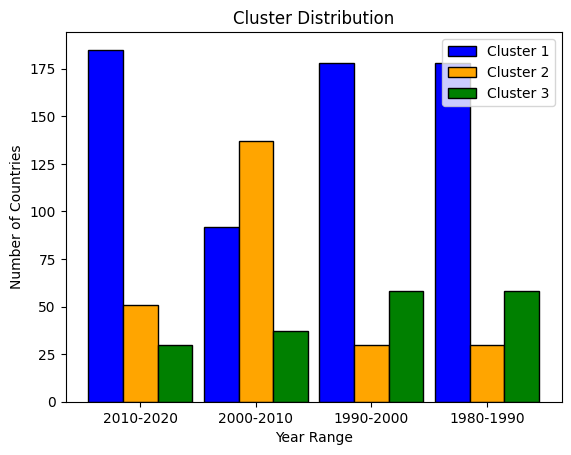

In [42]:
import matplotlib.pyplot as plt

# Define the data
years = ["2010-2020", "2000-2010", "1990-2000", "1980-1990"]
print_yearwise_change(years,cluster_1,cluster_2,cluster_3)





<ipython-input-65-59d1115569b5>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i//2][i%2].scatter(cluster_data[:, -3], cluster_data[:, -2], cluster_data[:, -1], cmap='viridis', s=100, label=cluster_name)


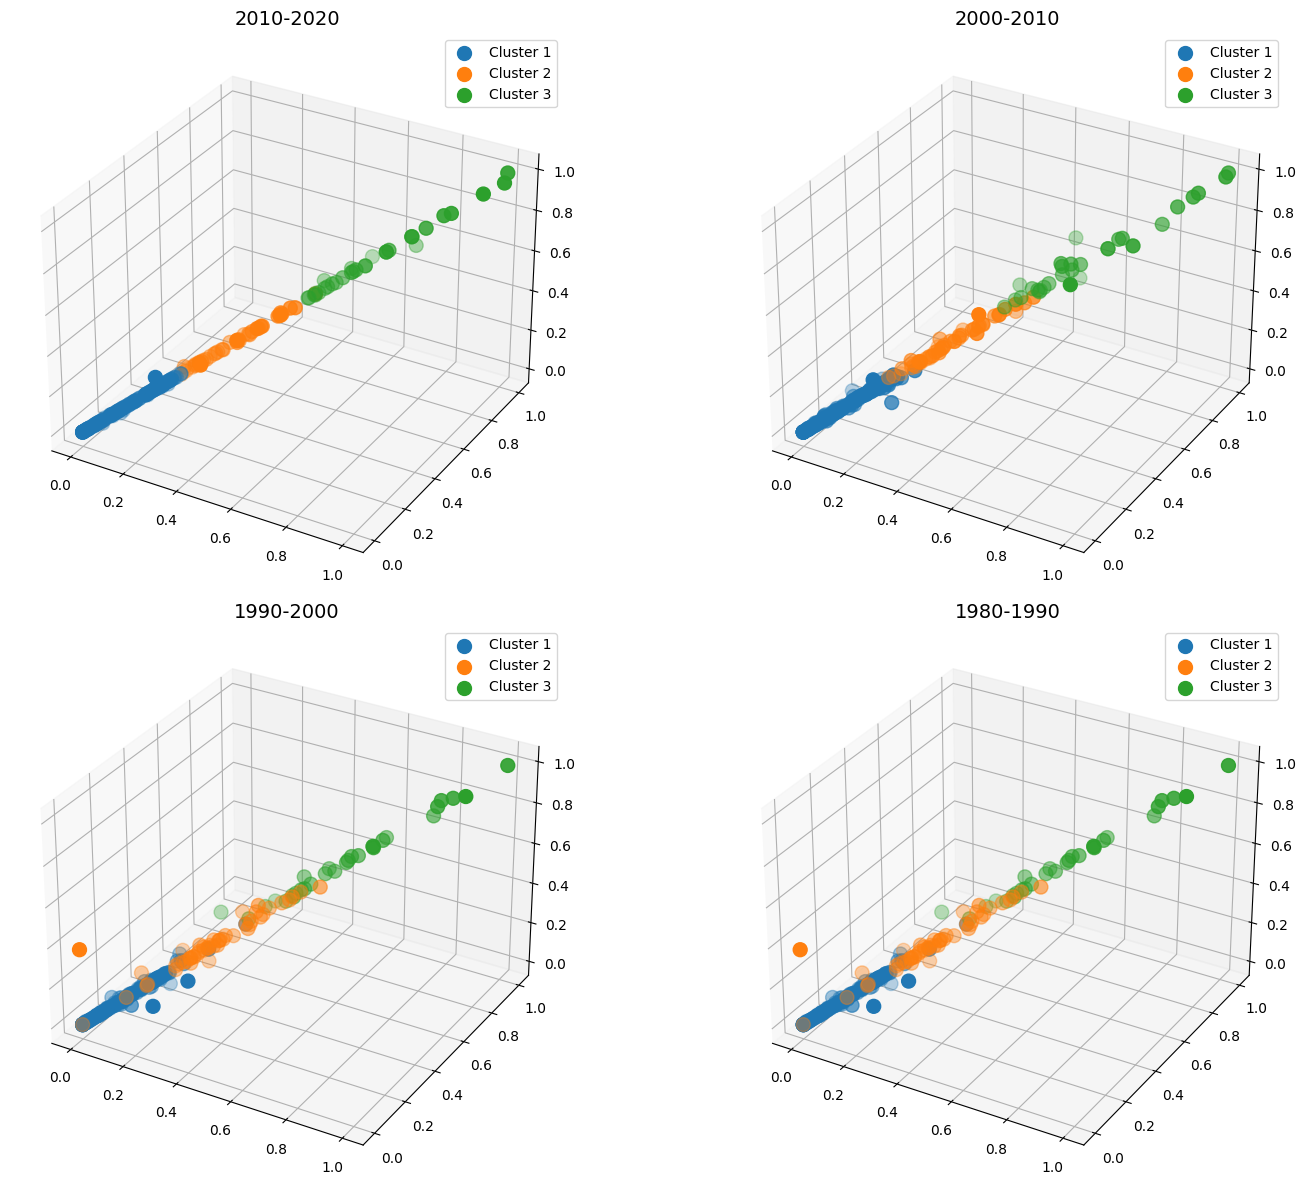

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with 4 subplots, one for each time interval
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), subplot_kw={'projection': '3d'})

# Loop over each time interval
for i, time_interval in enumerate([transformed_data_1, transformed_data_2, transformed_data_3, transformed_data_4]):

    # Loop over each cluster
    for cluster in range(3):
        # Filter the data for the current cluster
        cluster_data = time_interval[labels_1 == cluster]
        cluster_name = 'Cluster {}'.format(cluster + 1)

        # Create a scatter plot with color-coded points based on cluster assignments
        axs[i//2][i%2].scatter(cluster_data[:, -3], cluster_data[:, -2], cluster_data[:, -1], cmap='viridis', s=100, label=cluster_name)

    # Add axis labels and legend for each subplot
    axs[i//2][i%2].set_xlabel('', fontsize=12)
    axs[i//2][i%2].set_ylabel('', fontsize=12)
    axs[i//2][i%2].set_zlabel('', fontsize=12)
    axs[i//2][i%2].legend(fontsize=10)

    # Add a title for each subplot
    axs[i//2][i%2].set_title('{}'.format(['2010-2020', '2000-2010', '1990-2000', '1980-1990'][i]), fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
Selected_country='India'
country_data = df_arabale_temp.loc[df_arabale_temp['Country Name'] == Selected_country].iloc[:, 2:-2].T
years = np.array(range(1960, 2021))

In [79]:
country_data

,109
1960,0.000000
1961,52.403647
1962,52.704334
1963,52.963315
1964,53.051436
...,...
2016,52.575517
2017,52.433627
2018,52.293298
2019,52.256693


In [80]:
years = pd.DataFrame(years)


In [81]:
years=years.squeeze()

In [82]:
country_data=country_data.squeeze()

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039]
[50.97123302 51.03746782 51.10370262 51.16993742 51.23617222 51.30240702
 51.36864182 51.43487662 51.50111142 51.56734622 51.63358102 51.69981582
 51.76605062 51.83228542 51.89852022 51.96475502 52.03098982 52.09722462
 52.16345942 52.22969422 52.29592902 52.36216382 52.42839862 52.49463342
 52.56086822 52.62710302 52.69333782 52.75957262 52.82580742 52.89204222
 52.95827702 53.02451182 53.09074662 53.15698142 53.22321622 53.28945102
 53.35568582 53.42192062 53.48815542 53.55439022 53.62062502 53.68685982
 53.75309462 53.81932942 53.88556422 53.95179902 54.01803382 54.08426862
 54.15050

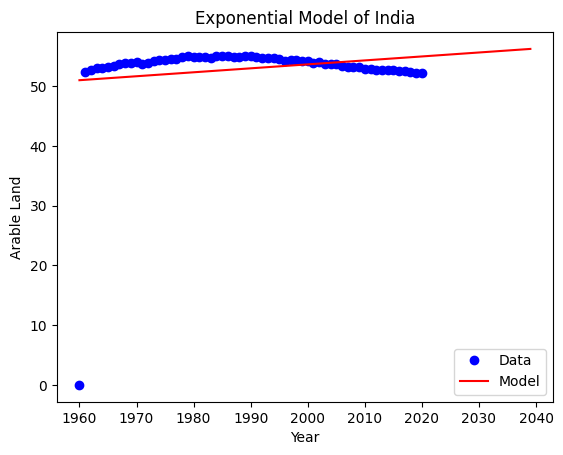

In [93]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Extract the relevant data columns
year = years
attribute = country_data
# Linear model
def linear_model(x, a, b):
    return a * x + b

# Fit the model to the data
popt, pcov = curve_fit(linear_model, year, attribute)

# Use the model to make predictions for the next 20 years
future_years = np.arange(year.min(), year.max() + 20)
future_attribute = linear_model(future_years, *popt)
print(future_years)
print(future_attribute)
# Estimate the confidence range using the attached function err_ranges
def err_ranges(popt, pcov, x):
    perr = np.sqrt(np.diag(pcov))
    y = linear_model(x, *popt)
    low = y - perr[0] * np.exp(popt[1] * (x - year.min()))
    high = y + perr[0] * np.exp(popt[1] * (x - year.min()))
    return low, high

future_low, future_high = err_ranges(popt, pcov, future_years)

# Plot the data, model, and confidence range
plt.plot(year, attribute, 'bo', label='Data')
plt.plot(future_years, future_attribute, 'r-', label='Model')
plt.fill_between(future_years, future_low, future_high, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Arable Land')
plt.title('Exponential Model of '+str(Selected_country))
plt.legend()
plt.show()


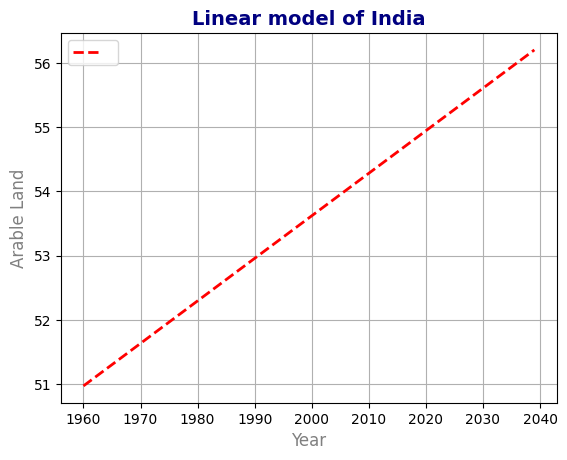

In [89]:
import matplotlib.pyplot as plt

# Define the x and y data
x = future_years
y = future_attribute

# Plot the data with a dashed red line
plt.plot(x, y, 'r--', linewidth=2)

# Add grid lines
plt.grid(True)

# Customize the axis labels and title
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Arable Land', fontsize=12, color='gray')
plt.title('Linear model of '+str(Selected_country), fontsize=14, fontweight='bold', color='navy')

# Add a legend
plt.legend([''], loc='upper left')

# Show the plot
plt.show()
